In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
pip install seaborn

In [2]:
# loading the diabetes data to a pandas DataFrame
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
# printing the first 5 rows of the data
diabetes_data.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [4]:
# printing the last 5 rows of the data
diabetes_data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
from dataprep.eda import plot
# using dataprep's plot method to get insights on each variable
plot(diabetes_data)

: 

In [6]:
from pandas_profiling import ProfileReport
# generate report with pandas profiling
profile = ProfileReport(diabetes_data, title='Report')
profile

Pandas backend loaded 1.4.4
Numpy backend loaded 1.22.4
Pyspark backend loaded 3.3.0
Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
import sweetviz as sv
my_report = sv.analyze(diabetes_data)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# number of rows and Columns in this dataset
diabetes_data.shape

(768, 9)

In [11]:
diabetes_data.size

6912

In [12]:
diabetes_data.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [13]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# getting the statistical measures of the data
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [15]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64

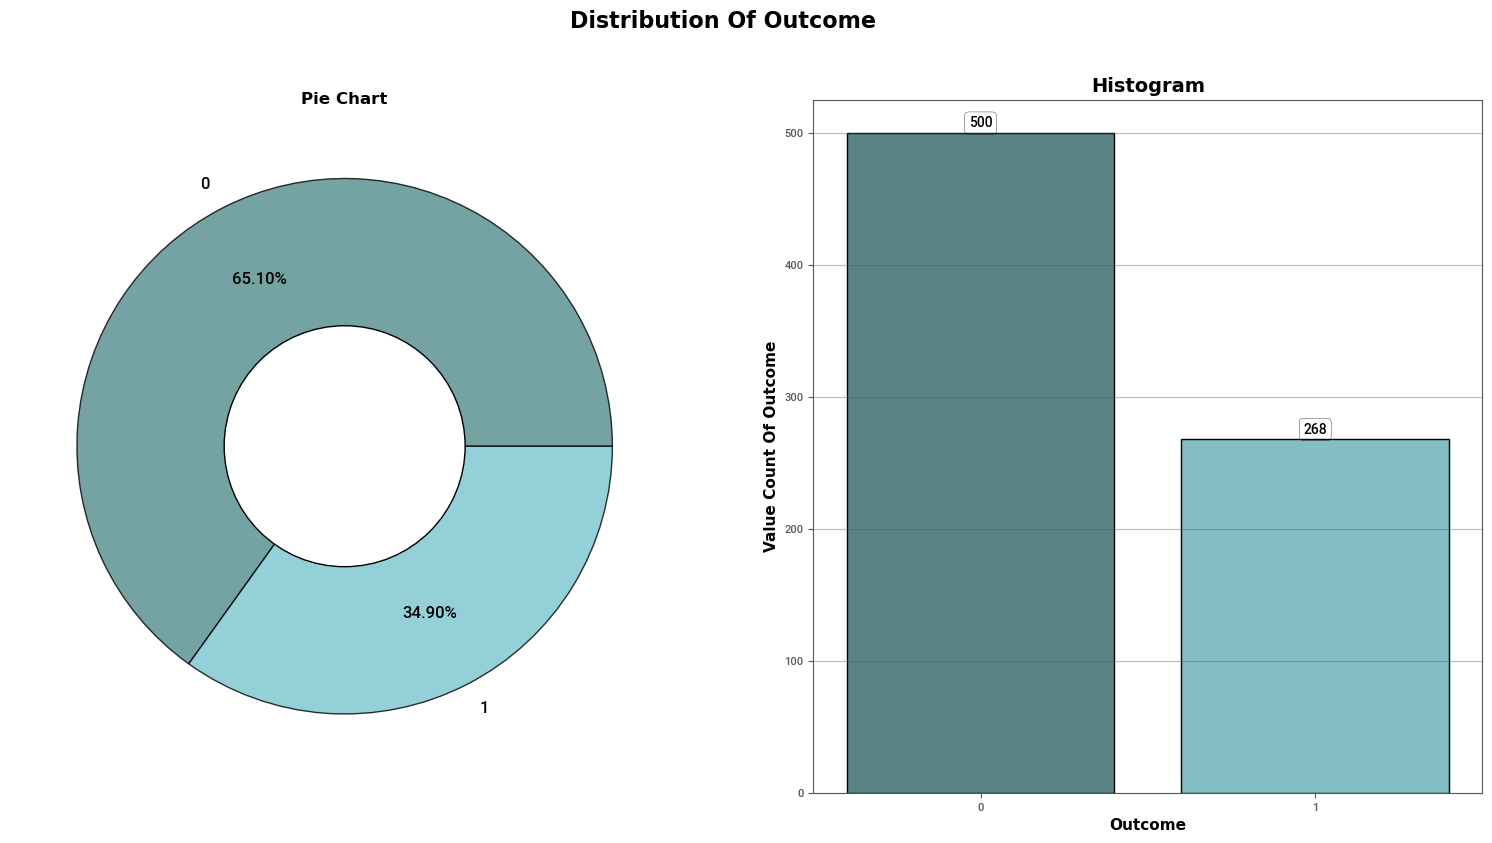

In [16]:
labels = [0, 1]
colors = ["#538B8B", "#7AC5CD"]
order = diabetes_data['Outcome'].value_counts().index
plt.figure(figsize = (19, 9))
plt.suptitle('Distribution Of Outcome', fontweight = 'heavy', fontsize = '16',
            fontfamily = 'sans-serif', color = "black")
# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight = 'bold', fontfamily = "sans-serif", color = 'black')
plt.pie(diabetes_data["Outcome"].value_counts(), pctdistance = 0.7, autopct = '%.2f%%', labels = labels,
wedgeprops = dict(alpha = 0.8, edgecolor = "black"), textprops = {'fontsize': 12}, colors = colors)
centre = plt.Circle((0,0), 0.45, fc = "white", edgecolor = "black")
plt.gcf().gca().add_artist(centre)
# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title("Histogram", fontweight = "bold", fontsize = 14, 
        fontfamily = "sans-serif", color = 'black')
ax = sns.countplot(x = "Outcome", data = diabetes_data, order = order, edgecolor = "black", palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4.25, rect.get_height(),
    horizontalalignment="center", fontsize = 10, bbox = dict(facecolor = "none", edgecolor = "black",
    linewidth = 0.25, boxstyle = "round"))
plt.xlabel("Outcome", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.ylabel("Value Count Of Outcome", fontweight = "bold", fontsize = 11, fontfamily = "sans-serif", color = "black")
plt.xticks([0, 1], labels)
plt.grid(axis = "y", alpha = 0.4)

diabetes_data['Outcome'].value_counts()

In [17]:
diabetes_data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [18]:
diabetes_data.duplicated().sum()

0

In [19]:
diabetes_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [20]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [21]:
diabetes_data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

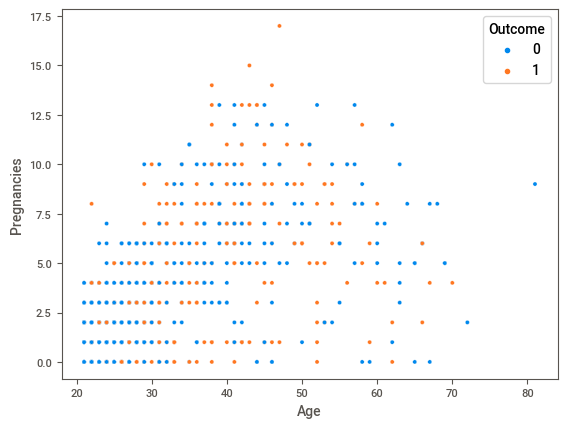

In [22]:
## Visualization of Purchase with age
sns.scatterplot('Age','Pregnancies',hue='Outcome',data=diabetes_data);

In [23]:
# separating the data and labels
X = diabetes_data.drop(columns = 'Outcome', axis=1)
Y = diabetes_data['Outcome']

In [24]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [25]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [27]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=0)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [32]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7802607076350093


In [34]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7705627705627706


In [36]:
input_data = (1,85,66,29,0,26.6,0.351,31) # 0

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('This patient is not diabetic')
else:
    print('This patient is diabetic')

[0]
This patient is not diabetic


In [37]:
input_data = (0,137,40,35,168,43.1,2.288,33) # 1


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('This patient is not diabetic')
else:
    print('This patient is diabetic')

[1]
This patient is diabetic


In [38]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, Y_train)

LogisticRegression()

In [39]:
y_pred = logisticRegr.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [40]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, Y_test)
print(score)

0.7705627705627706


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_test)

0.7705627705627706

In [42]:
y_pred.shape

(231,)

In [43]:
Y_test.shape

(231,)

In [44]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, y_pred)
print(cm)

[[133  17]
 [ 36  45]]


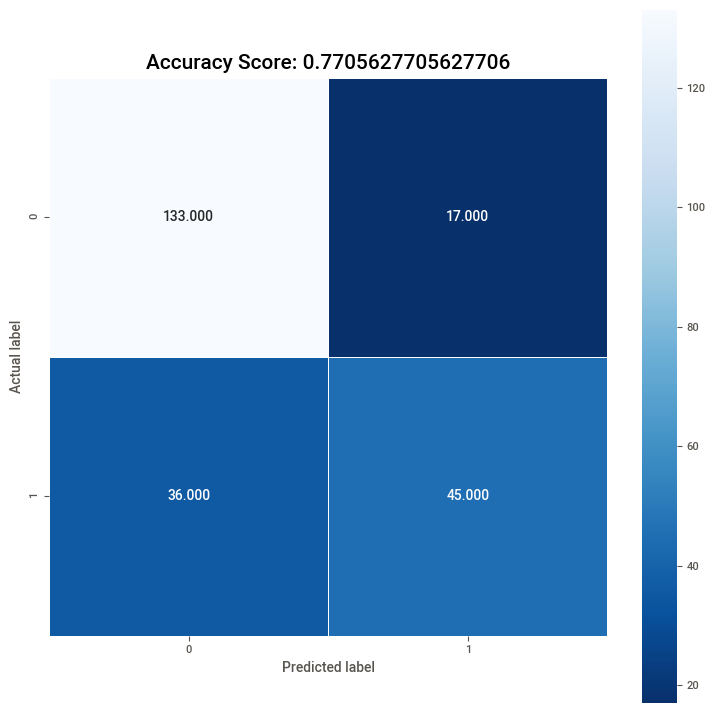

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [46]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [47]:
diabetes_data = RandomForestClassifier(random_state=1)
diabetes_data.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [48]:
diabetes_data_pred_train = diabetes_data.predict(X_train)
diabetes_data_pred_test = diabetes_data.predict(X_test)

In [49]:
diabetes_data.score(X_train, Y_train)

1.0

In [50]:
diabetes_data.score(X_test, Y_test)

0.7878787878787878

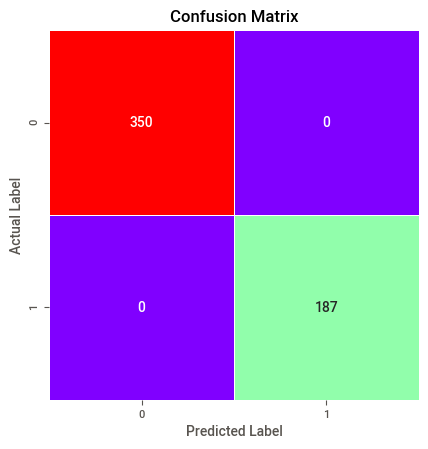

In [51]:
confusion_matrix(Y_train, diabetes_data_pred_train)
sns.heatmap(confusion_matrix(Y_train, diabetes_data_pred_train),annot=True, fmt='d',cbar=False, linewidths=.5, square = True, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.show()

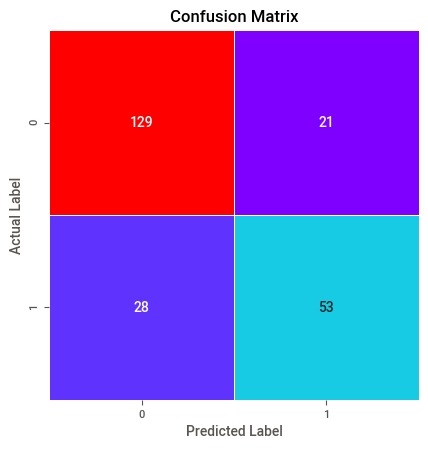

In [52]:
confusion_matrix(Y_test, diabetes_data_pred_test)
sns.heatmap(confusion_matrix(Y_test, diabetes_data_pred_test),annot=True, fmt='d',cbar=False, linewidths=.5, square = True, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.show()

In [53]:
xgb_model = XGBClassifier(n_estimators=1000)
xgb_model.fit(X_train, Y_train, eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
from sklearn.metrics import accuracy_score, classification_report
diabetes_data_pred_train = xgb_model.predict(X_train)
diabetes_data_pred_test = xgb_model.predict(X_test)
target = sorted(set(Y))

print(f'Training accuracy: {accuracy_score(Y_train, diabetes_data_pred_train)}')
print(f'Training:\n {classification_report(Y_train, diabetes_data_pred_train, labels=target)}')
print(f'Testing accuracy: {accuracy_score(Y_test, diabetes_data_pred_test)}')
print(f'Testing:\n {classification_report(Y_test, diabetes_data_pred_test, labels=target)}')

Training accuracy: 1.0
Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Testing accuracy: 0.7532467532467533
Testing:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       150
           1       0.66      0.62      0.64        81

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



In [55]:
y_predicted = xgb_model.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [56]:
print(len(Y_test))

231


In [57]:
confusion_matrix(Y_test,y_predicted)

array([[124,  26],
       [ 31,  50]])

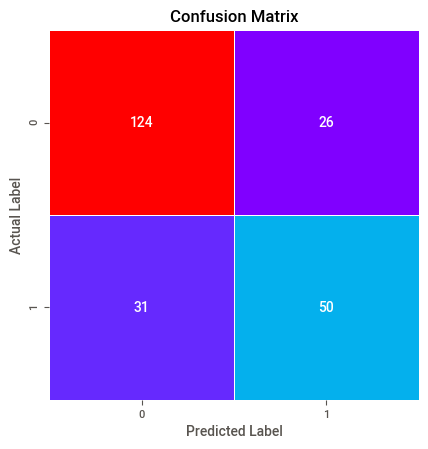

In [58]:
confusion_matrix(Y_test, diabetes_data_pred_test)
sns.heatmap(confusion_matrix(Y_test, diabetes_data_pred_test),annot=True, fmt='d',cbar=False, linewidths=.5, square = True, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.show()

In [59]:
#import joblib
 
# Save the model as a pickle in a file
#joblib.dump(XGBClassifier(n_estimators=1000), 'xgb_model.pkl')

In [60]:
# Load the model from the file
#xgb_from_joblib = joblib.load('xgb_model.pkl')

In [61]:
# Use the loaded model to make predictions
#xgb_from_joblib.predict(X_test)

In [62]:
import pickle
# Checks first to see if file already exists.
# If not the model is saved to disk
import os.path
if os.path.isfile('diabetes_prediction.sav') is False:
    pickle.dump(classifier, open('diabetes_prediction.sav', 'wb'))

In [63]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_prediction.sav', 'rb'))

In [64]:
input_data = (6,148,72,35,0,33.6,0.627,50) # 1

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('This patient is not diabetic')
else:
    print('This patient is diabetic')

[1]
This patient is diabetic


In [65]:
input_data = (1,89,66,23,94,28.1,0.167,21) # 0

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('This patient is not diabetic')
else:
    print('This patient is diabetic')

[0]
This patient is not diabetic
